In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pytz
import tzlocal

In [393]:
df = pd.read_csv("eventlogs.csv")
df.head()

,_id,chatbot_id,createdAt,event,properties.chatbot_id,properties.flowchart,properties.flowchart_name,properties.instance_id,properties.message,properties.message.data.bodyText,...,properties.message.type,properties.message_text,properties.properties.body.params,properties.properties.body.urlEncoded,properties.properties.headers,properties.properties.method,properties.properties.outputMapping,properties.properties.url,properties.uniq_id,uniq_id
0,63a44c2899fbd802a6c748b9,63a294b7e20457eac7473f25,1671711784792,new_message,63a294b7e20457eac7473f25,NaN,NaN,NaN,NaN,NaN,...,NaN,Hi,NaN,NaN,NaN,NaN,NaN,NaN,589592.0,589592
1,63a44c2899fbd802a6c748bb,63a294b7e20457eac7473f25,1671711784794,session_start,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589592
2,63a44c2899fbd802a6c748bc,63a294b7e20457eac7473f25,1671711784795,sending_message,63a294b7e20457eac7473f25,NaN,NaN,NaN,Start,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589592.0,589592
3,63a44c2899fbd802a6c748c3,63a294b7e20457eac7473f25,1671711784835,message_response,63a294b7e20457eac7473f25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589592.0,589592
4,63a44c4699fbd802a6c748c8,63a294b7e20457eac7473f25,1671711814681,new_message,63a294b7e20457eac7473f25,NaN,NaN,NaN,NaN,NaN,...,NaN,Hi,NaN,NaN,NaN,NaN,NaN,NaN,589592.0,589592


In [394]:
df.shape

(49, 31)

In [395]:
df.isna().sum().reset_index()

,index,0
0,_id,0
1,chatbot_id,0
2,createdAt,0
3,event,0
4,properties.chatbot_id,10
5,properties.flowchart,33
6,properties.flowchart_name,48
7,properties.instance_id,48
8,properties.message,44
9,properties.message.data.bodyText,42


In [396]:
df.drop(df.columns[[4,7,11,14,15,16,17,20,21,22,23]], axis=1, inplace=True)


In [397]:
#dealing with null values

In [398]:
df = df.fillna('')

In [399]:
df

,_id,chatbot_id,createdAt,event,properties.flowchart,properties.flowchart_name,properties.message,properties.message.data.bodyText,properties.message.data.buttonText,properties.message.data.buttonsList.button_id_2,properties.message.data.buttonsList.button_id_3,properties.message.data.sections.POST,properties.message.data.text.message,properties.properties.body.urlEncoded,properties.properties.headers,properties.properties.method,properties.properties.outputMapping,properties.properties.url,properties.uniq_id,uniq_id
0,63a44c2899fbd802a6c748b9,63a294b7e20457eac7473f25,1671711784792,new_message,,,,,,,,,,,,,,,589592.0,589592
1,63a44c2899fbd802a6c748bb,63a294b7e20457eac7473f25,1671711784794,session_start,,,,,,,,,,,,,,,,589592
2,63a44c2899fbd802a6c748bc,63a294b7e20457eac7473f25,1671711784795,sending_message,,,Start,,,,,,,,,,,,589592.0,589592
3,63a44c2899fbd802a6c748c3,63a294b7e20457eac7473f25,1671711784835,message_response,,,,,,,,,,,,,,,589592.0,589592
4,63a44c4699fbd802a6c748c8,63a294b7e20457eac7473f25,1671711814681,new_message,,,,,,,,,,,,,,,589592.0,589592
5,63a44c4699fbd802a6c748cc,63a294b7e20457eac7473f25,1671711814686,sending_message,,,"Sorry, I am still learning.",,,,,,,,,,,,589592.0,589592
6,63a44c4699fbd802a6c748d0,63a294b7e20457eac7473f25,1671711814691,message_response,,,,,,,,,,,,,,,589592.0,589592
7,63a44c5999fbd802a6c748d2,63a294b7e20457eac7473f25,1671711833849,new_message,,,,,,,,,,,,,,,589592.0,589592
8,63a44c5999fbd802a6c748d6,63a294b7e20457eac7473f25,1671711833855,sending_message,,,Thank you for your time.,,,,,,,,,,,,589592.0,589592
9,63a44c5999fbd802a6c748da,63a294b7e20457eac7473f25,1671711833862,message_response,,,,,,,,,,,,,,,589592.0,589592


In [400]:
# sending message ----------> chatbot.
# new message ---------------> user.

df2 = df.groupby('event').size().sort_values(ascending=False).reset_index()
df2.rename(columns =  {0:'status'},inplace = True)
print(df2)

              event  status
0  message_response      13
1       new_message      13
2   sending_message      13
3     session_start       6
4       session_end       3
5          api_call       1


<AxesSubplot: ylabel='status'>

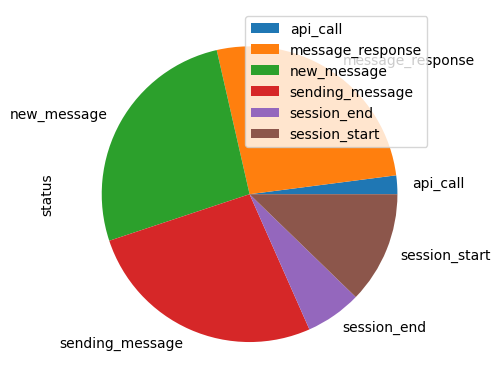

In [401]:
# Plotting the pie chart for above dataframe
df2.groupby(['event']).sum().plot(
kind='pie', y='status')

In [402]:
# Find the number of user intreact with chatboat.

In [403]:
df['uniq_id'].unique()

array([589592], dtype=int64)

In [404]:

n = len(pd.unique(df['chatbot_id']))
n


1

In [405]:
n = len(pd.unique(df['_id']))
n

49

In [406]:
n = len(pd.unique(df['uniq_id']))
n

1

In [407]:
# convert utc time stamp to datetime formate
# pd.to_datetime(int('1671712543728'), utc=False, unit='ms')
df['utc_to_datetime'] = pd.to_datetime(df['createdAt'], utc=False, unit='ms')

In [408]:
df.dtypes

_id                                                        object
chatbot_id                                                 object
createdAt                                                   int64
event                                                      object
properties.flowchart                                       object
properties.flowchart_name                                  object
properties.message                                         object
properties.message.data.bodyText                           object
properties.message.data.buttonText                         object
properties.message.data.buttonsList.button_id_2            object
properties.message.data.buttonsList.button_id_3            object
properties.message.data.sections.POST                      object
properties.message.data.text.message                       object
properties.properties.body.urlEncoded                      object
properties.properties.headers                              object
properties

In [409]:
df['time'] = df['utc_to_datetime'].dt.strftime('%H:%M:%S')
df.head()

,_id,chatbot_id,createdAt,event,properties.flowchart,properties.flowchart_name,properties.message,properties.message.data.bodyText,properties.message.data.buttonText,properties.message.data.buttonsList.button_id_2,...,properties.message.data.text.message,properties.properties.body.urlEncoded,properties.properties.headers,properties.properties.method,properties.properties.outputMapping,properties.properties.url,properties.uniq_id,uniq_id,utc_to_datetime,time
0,63a44c2899fbd802a6c748b9,63a294b7e20457eac7473f25,1671711784792,new_message,,,,,,,...,,,,,,,589592.0,589592,2022-12-22 12:23:04.792,12:23:04
1,63a44c2899fbd802a6c748bb,63a294b7e20457eac7473f25,1671711784794,session_start,,,,,,,...,,,,,,,,589592,2022-12-22 12:23:04.794,12:23:04
2,63a44c2899fbd802a6c748bc,63a294b7e20457eac7473f25,1671711784795,sending_message,,,Start,,,,...,,,,,,,589592.0,589592,2022-12-22 12:23:04.795,12:23:04
3,63a44c2899fbd802a6c748c3,63a294b7e20457eac7473f25,1671711784835,message_response,,,,,,,...,,,,,,,589592.0,589592,2022-12-22 12:23:04.835,12:23:04
4,63a44c4699fbd802a6c748c8,63a294b7e20457eac7473f25,1671711814681,new_message,,,,,,,...,,,,,,,589592.0,589592,2022-12-22 12:23:34.681,12:23:34


In [410]:
df["Flowchart"] = df["properties.flowchart_name"].map(str) + "" + df["properties.flowchart"]
df.head()

,_id,chatbot_id,createdAt,event,properties.flowchart,properties.flowchart_name,properties.message,properties.message.data.bodyText,properties.message.data.buttonText,properties.message.data.buttonsList.button_id_2,...,properties.properties.body.urlEncoded,properties.properties.headers,properties.properties.method,properties.properties.outputMapping,properties.properties.url,properties.uniq_id,uniq_id,utc_to_datetime,time,Flowchart
0,63a44c2899fbd802a6c748b9,63a294b7e20457eac7473f25,1671711784792,new_message,,,,,,,...,,,,,,589592.0,589592,2022-12-22 12:23:04.792,12:23:04,
1,63a44c2899fbd802a6c748bb,63a294b7e20457eac7473f25,1671711784794,session_start,,,,,,,...,,,,,,,589592,2022-12-22 12:23:04.794,12:23:04,
2,63a44c2899fbd802a6c748bc,63a294b7e20457eac7473f25,1671711784795,sending_message,,,Start,,,,...,,,,,,589592.0,589592,2022-12-22 12:23:04.795,12:23:04,
3,63a44c2899fbd802a6c748c3,63a294b7e20457eac7473f25,1671711784835,message_response,,,,,,,...,,,,,,589592.0,589592,2022-12-22 12:23:04.835,12:23:04,
4,63a44c4699fbd802a6c748c8,63a294b7e20457eac7473f25,1671711814681,new_message,,,,,,,...,,,,,,589592.0,589592,2022-12-22 12:23:34.681,12:23:34,


In [411]:
df['combined_column'] = df[df.columns[6:13]].apply(
    lambda x: '|'.join(x.dropna().astype(str)),
    axis=1
)
df

,_id,chatbot_id,createdAt,event,properties.flowchart,properties.flowchart_name,properties.message,properties.message.data.bodyText,properties.message.data.buttonText,properties.message.data.buttonsList.button_id_2,...,properties.properties.headers,properties.properties.method,properties.properties.outputMapping,properties.properties.url,properties.uniq_id,uniq_id,utc_to_datetime,time,Flowchart,combined_column
0,63a44c2899fbd802a6c748b9,63a294b7e20457eac7473f25,1671711784792,new_message,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:04.792,12:23:04,,||||||
1,63a44c2899fbd802a6c748bb,63a294b7e20457eac7473f25,1671711784794,session_start,,,,,,,...,,,,,,589592,2022-12-22 12:23:04.794,12:23:04,,||||||
2,63a44c2899fbd802a6c748bc,63a294b7e20457eac7473f25,1671711784795,sending_message,,,Start,,,,...,,,,,589592.0,589592,2022-12-22 12:23:04.795,12:23:04,,Start||||||
3,63a44c2899fbd802a6c748c3,63a294b7e20457eac7473f25,1671711784835,message_response,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:04.835,12:23:04,,||||||
4,63a44c4699fbd802a6c748c8,63a294b7e20457eac7473f25,1671711814681,new_message,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:34.681,12:23:34,,||||||
5,63a44c4699fbd802a6c748cc,63a294b7e20457eac7473f25,1671711814686,sending_message,,,"Sorry, I am still learning.",,,,...,,,,,589592.0,589592,2022-12-22 12:23:34.686,12:23:34,,"Sorry, I am still learning.||||||"
6,63a44c4699fbd802a6c748d0,63a294b7e20457eac7473f25,1671711814691,message_response,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:34.691,12:23:34,,||||||
7,63a44c5999fbd802a6c748d2,63a294b7e20457eac7473f25,1671711833849,new_message,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:53.849,12:23:53,,||||||
8,63a44c5999fbd802a6c748d6,63a294b7e20457eac7473f25,1671711833855,sending_message,,,Thank you for your time.,,,,...,,,,,589592.0,589592,2022-12-22 12:23:53.855,12:23:53,,Thank you for your time.||||||
9,63a44c5999fbd802a6c748da,63a294b7e20457eac7473f25,1671711833862,message_response,,,,,,,...,,,,,589592.0,589592,2022-12-22 12:23:53.862,12:23:53,,||||||


In [412]:
df['combined_column'].iloc[12]

'|Hi there,\nWelcome to *Vahak*||Talk to our agent|Exit||'

In [413]:
df3 = df.groupby('combined_column').size().sort_values(ascending=False).reset_index()
df3.rename(columns =  {0:'freq'},inplace = True)
df3


,combined_column,freq
0,||||||,36
1,"|Hi there,\nWelcome to *Vahak*||Talk to our ag...",5
2,I am tapping out.||||||,2
3,|This is some body text|Service selection|||[{...,2
4,"Sorry, I am still learning.||||||",1
5,Start||||||,1
6,Thank you for your time.||||||,1
7,||||||Details are <<dataCD.name>>.\nStatus is ...,1
